# Titinic 

Variable Notes
pclass: A proxy for socio-economic status (SES)<br>
1st = Upper<br>
2nd = Middle<br>
3rd = Lower<br>

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...<br>
Sibling = brother, sister, stepbrother, stepsister<br>
Spouse = husband, wife (mistresses and fiancés were ignored)<br>

parch: The dataset defines family relations in this way...<br>
Parent = mother, father<br>
Child = daughter, son, stepdaughter, stepson<br>
Some children travelled only with a nanny, therefore parch=0 for them.<br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

#%matplotlib inline 의 역할은 notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 1. Data Load

In [2]:
train = pd.read_csv("data/train.csv", index_col="PassengerId")
test = pd.read_csv("data/test.csv", index_col="PassengerId")
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


# 2. Data Set Check

In [3]:
#train.dtypes
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 2-1. Null Check
### 2-1-1. Missingno

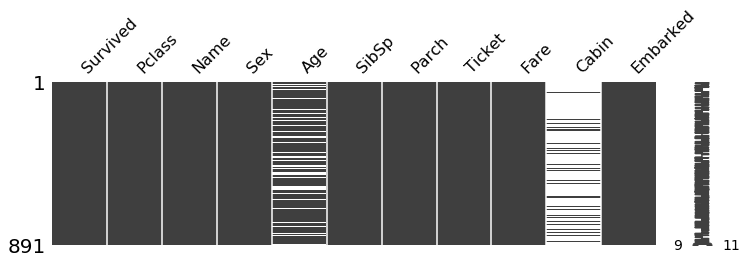

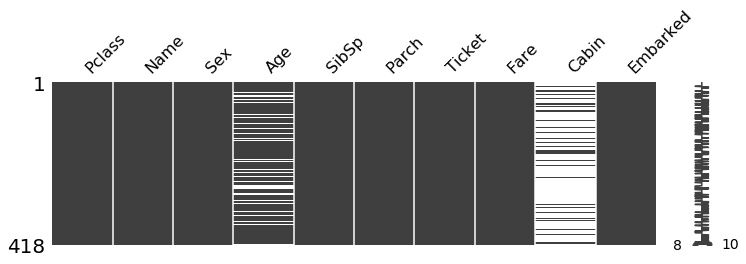

In [8]:
msno.matrix(train, figsize=(12,3))
msno.matrix(test, figsize=(12,3))

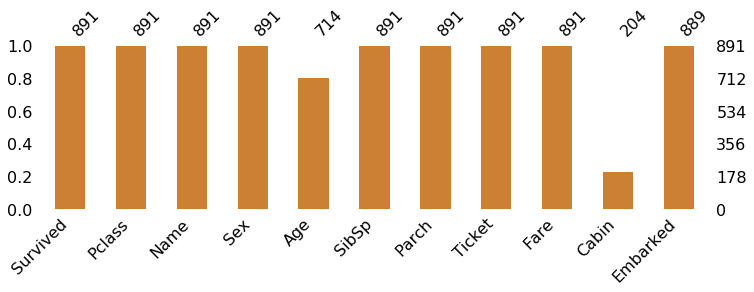

In [9]:
msno.bar(train, figsize=(12, 3), color=(0.8, 0.5, 0.2))

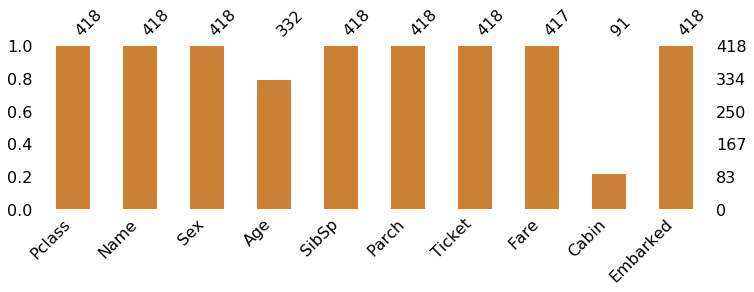

In [10]:
msno.bar(test, figsize=(12, 3), color=(0.8, 0.5, 0.2))

### 2-1-2. IsNullColumns

In [11]:
for col in train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'
    print(msg.format(col, 100 * (train[col].isnull().sum() / train[col].shape[0])))

column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [12]:
for col in test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'
    print(msg.format(col, 100 * (test[col].isnull().sum() / test[col].shape[0])))

column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


In [13]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [14]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

### 2-1-3. Target label Check

<function matplotlib.pyplot.show(*args, **kw)>

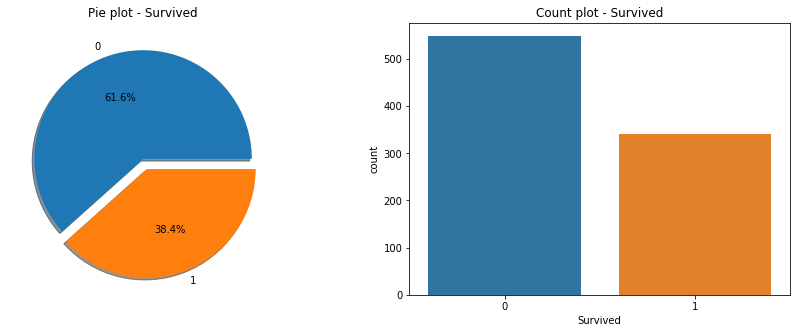

In [15]:
figure, ax = plt.subplots(1, 2, figsize = (15, 5))

train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot(data = train, x= 'Survived', ax = ax[1])
ax[1].set_title('Count plot - Survived')

plt.show

# 3. Visualization
### 3-1. Sex

In [16]:
print(train[['Sex', 'Survived']].groupby(['Sex'], as_index = True).count())
print(train[['Sex', 'Survived']].groupby(['Sex'], as_index = True).sum())
print(train[['Sex', 'Survived']].groupby(['Sex'], as_index = True).mean())

        Survived
Sex             
female       314
male         577
        Survived
Sex             
female       233
male         109
        Survived
Sex             
female  0.742038
male    0.188908


In [17]:
# crosstab
pd.crosstab(train['Sex'], train['Survived'], margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


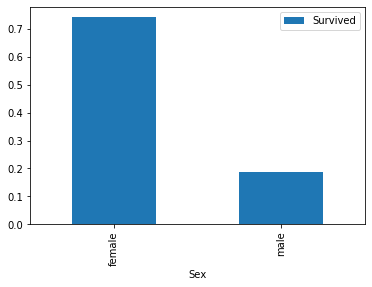

In [18]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index = True).mean().sort_values(
                                                                        by = 'Survived', ascending = False).plot.bar()

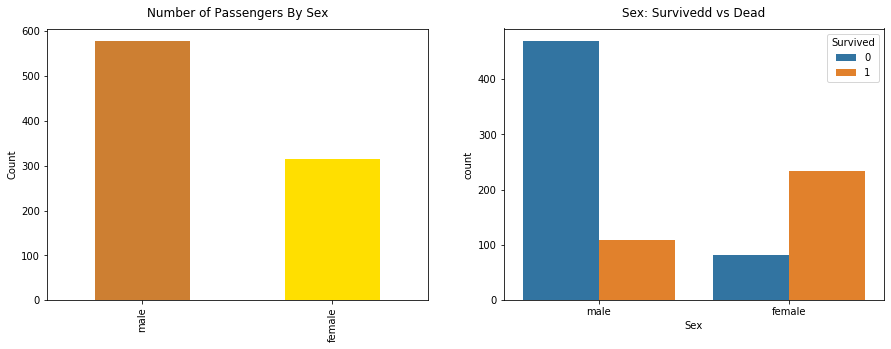

In [19]:
figure, ax = plt.subplots(1, 2, figsize = (15, 5))

train['Sex'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', '#D3D3D3'], ax = ax[0])

ax[0].set_title('Number of Passengers By Sex', y = 1.02)
ax[0].set_ylabel('Count')

sns.countplot(data = train, x = 'Sex', hue = 'Survived', ax = ax[1])
ax[1].set_title('Sex: Survivedd vs Dead', y = 1.02)

plt.show()

,Survived
Sex,
female,0.742038
male,0.188908


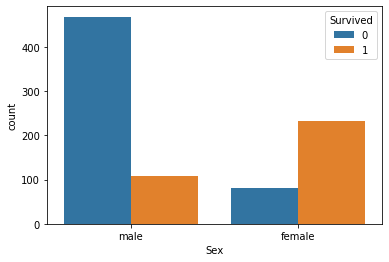

In [20]:
# 시각화 + 피봇(수치) 둘다 병행하는 것이 좋음
# sns.countplot(data=, x=, hue=)
# pd.pivot_table(data, index=, values=)
sns.countplot(data=train, x="Sex", hue="Survived")
pd.pivot_table(train, index="Sex", values="Survived")

### 3-2. Pclass

In [21]:
# groupby
print(train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count())
print(train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).sum())
print(train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean())

        Survived
Pclass          
1            216
2            184
3            491
        Survived
Pclass          
1            136
2             87
3            119
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


In [22]:
# crosstab
pd.crosstab(train['Pclass'], train['Survived'], margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


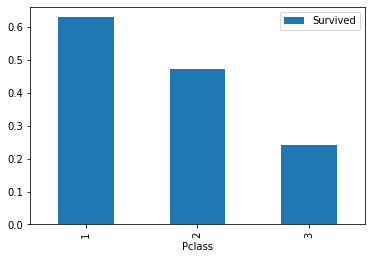

In [23]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean().sort_values(
                                                                        by = 'Survived', ascending = False).plot.bar()

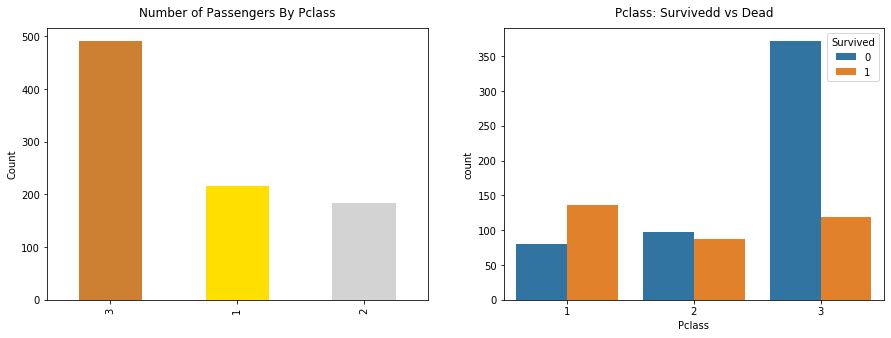

In [24]:
figure, ax = plt.subplots(1, 2, figsize = (15, 5))

train['Pclass'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', '#D3D3D3'], ax = ax[0])

ax[0].set_title('Number of Passengers By Pclass', y = 1.02)
ax[0].set_ylabel('Count')

sns.countplot(data = train, x = 'Pclass', hue = 'Survived', ax = ax[1])
ax[1].set_title('Pclass: Survivedd vs Dead', y = 1.02)

plt.show()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


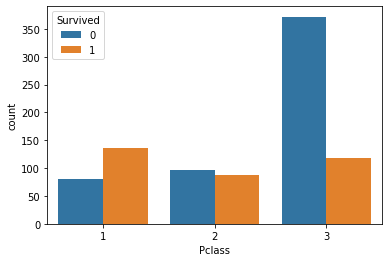

In [25]:
sns.countplot(data=train, x="Pclass", hue="Survived")
pd.pivot_table(train, index="Pclass", values="Survived")

### 3-3. Embarked

In [26]:
print(train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).count())
print(train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).sum())
print(train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean())

          Survived
Embarked          
C              168
Q               77
S              644
          Survived
Embarked          
C               93
Q               30
S              217
          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.336957


In [27]:
# crosstab
pd.crosstab(train['Embarked'], train['Survived'], margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


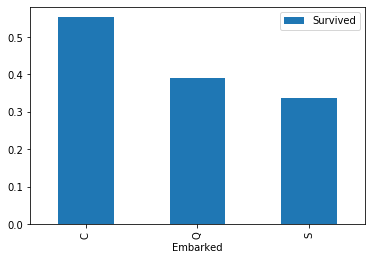

In [28]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(
                                                                        by = 'Survived', ascending = False).plot.bar()

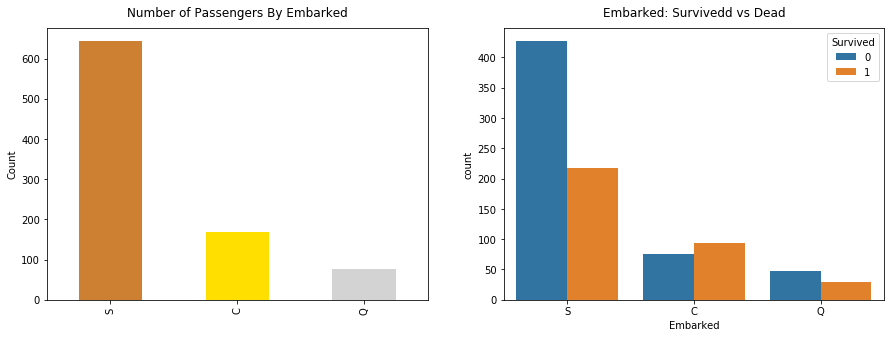

In [29]:
figure, ax = plt.subplots(1, 2, figsize = (15, 5))

train['Embarked'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', '#D3D3D3'], ax = ax[0])

ax[0].set_title('Number of Passengers By Embarked', y = 1.02)
ax[0].set_ylabel('Count')

sns.countplot(data = train, x = 'Embarked', hue = 'Survived', ax = ax[1])
ax[1].set_title('Embarked: Survivedd vs Dead', y = 1.02)

plt.show()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


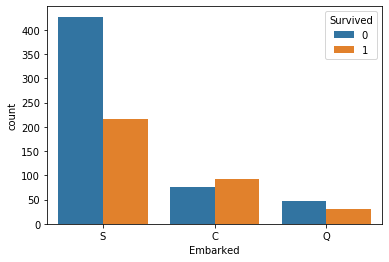

In [30]:
sns.countplot(data=train, x="Embarked", hue="Survived")
pd.pivot_table(train, index="Embarked", values="Survived")

### 3-4. Both Sex and Pclass

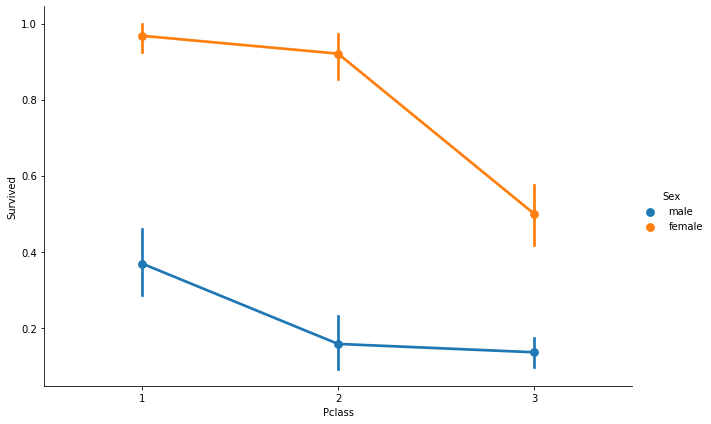

In [31]:
sns.factorplot(data = train, x = 'Pclass', y = 'Survived', hue = 'Sex', size = 6, aspect = 1.5 )

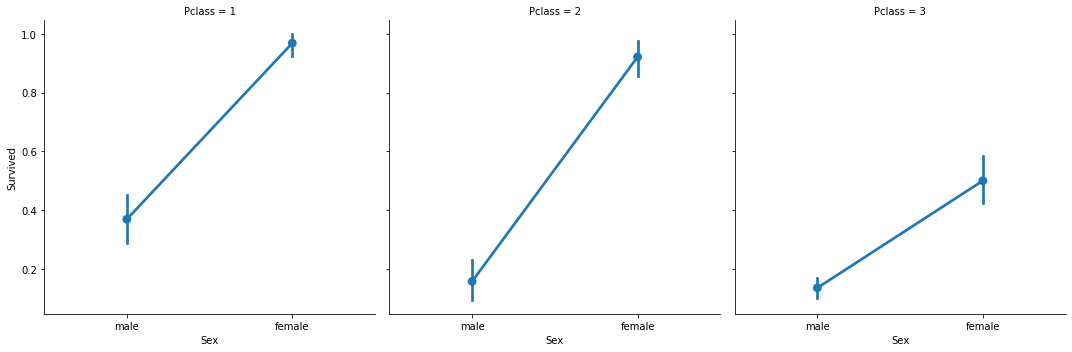

In [32]:
# hue 대신 column
sns.factorplot(data = train, x = 'Sex', y = 'Survived', col = 'Pclass', satureation = .5, size = 5, aspect = 1)

### 3-5. Age

In [33]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(train['Age'].max()))
print('제일 나이 어린 탑승객 : {:.1f} Years'.format(train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 나이 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


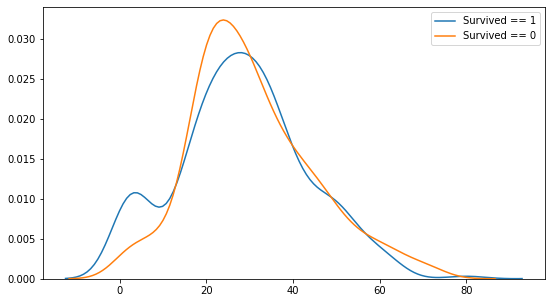

In [34]:
figure, ax = plt.subplots(1, 1, figsize=(9, 5))

sns.kdeplot(train[train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(train[train['Survived'] == 0]['Age'], ax=ax)

# 구분박스
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

Text(0.5, 0, 'Age')

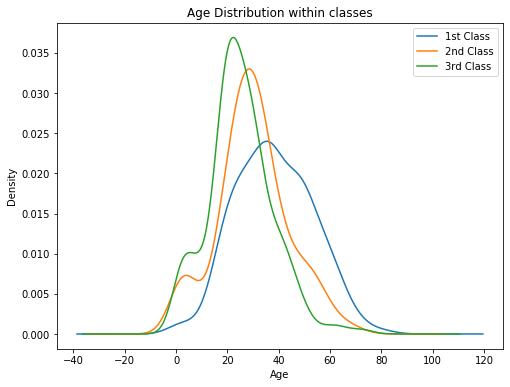

In [35]:
# Pclass 별로 나이대 확인
plt.figure(figsize=(8, 6))

train['Age'][train['Pclass'] == 1].plot(kind='kde')
train['Age'][train['Pclass'] == 2].plot(kind='kde')
train['Age'][train['Pclass'] == 3].plot(kind='kde')

plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.xlabel('Age')

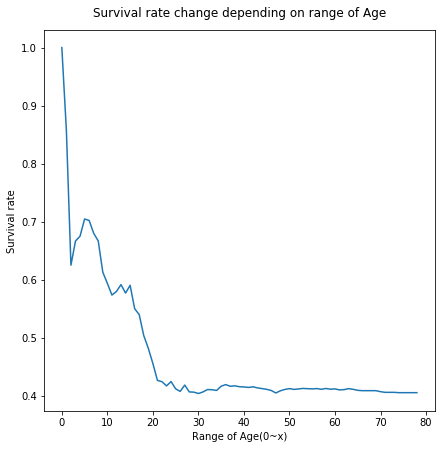

In [36]:
# 80세까지 생존율 확인
cummulate_survival_ratio = []

for i in range(1, 80):
    cummulate_survival_ratio.append(train[train['Age'] < i]['Survived'].sum() / len(train[train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

### 3-6. Pclass, Sex, Age

<function matplotlib.pyplot.show(*args, **kw)>

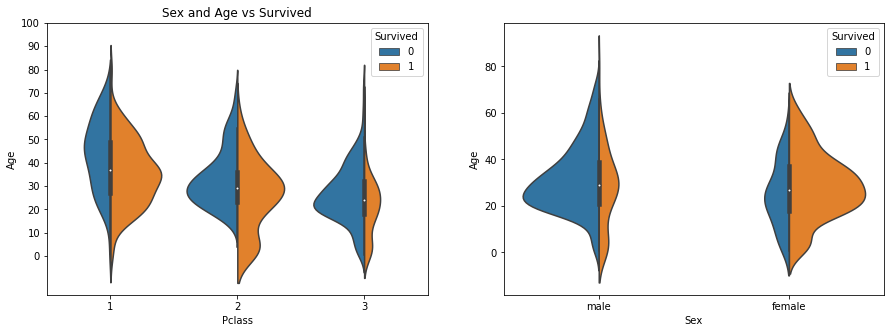

In [37]:
figure, ax = plt.subplots(1, 2, figsize = (15, 5))

sns.violinplot(data = train, x = 'Pclass', y = 'Age', hue = 'Survived', scale = 'count', split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10)) #좌측 범위 

sns.violinplot(data = train, x = 'Sex', y = 'Age', hue = 'Survived', scale = 'count', split = True, ax = ax[1])
ax[0].set_title('Sex and Age vs Survived')
ax[0].set_yticks(range(0,110,10))  

plt.show

### 3-7. Embarked

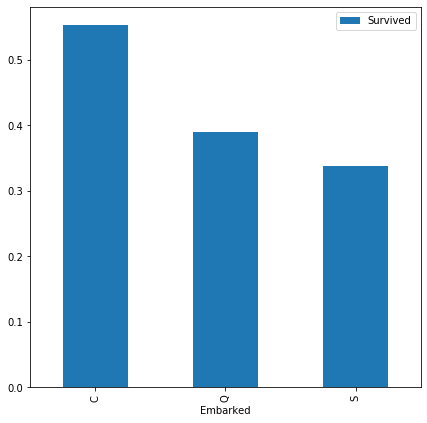

In [38]:
figure, ax = plt.subplots(1, 1, figsize = (7, 7))

train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(
    by = 'Survived', ascending = False).plot.bar(ax = ax)

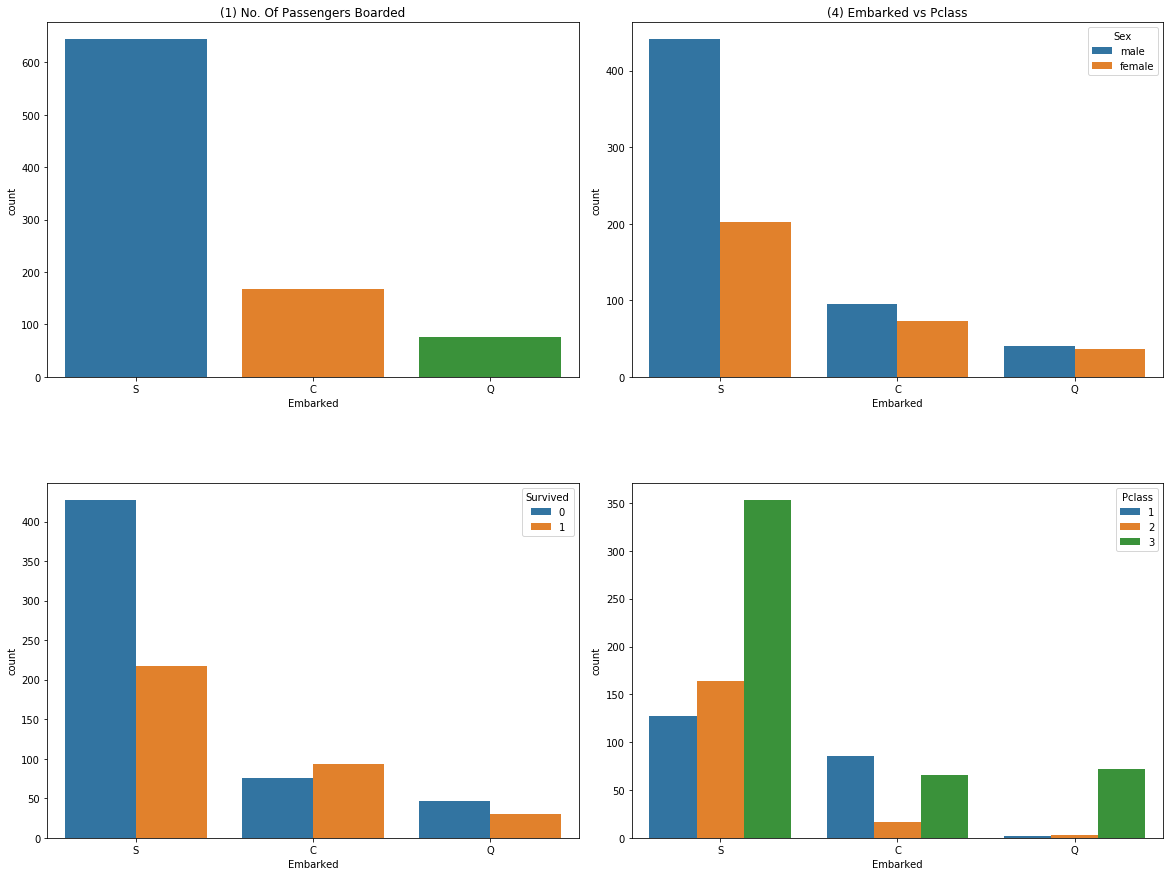

In [39]:
figure, ax = plt.subplots(2, 2, figsize = (20, 15))

sns.countplot(data = train, x = 'Embarked', ax = ax[0, 0])
ax[0, 0].set_title('(1) No. Of Passengers Boarded')

sns.countplot(data = train, x = 'Embarked', hue = 'Sex', ax = ax[0, 1])
ax[0, 1].set_title('(2) Male-Female split for Embarked')

sns.countplot(data = train, x = 'Embarked', hue = 'Survived', ax = ax[1, 0])
ax[0, 1].set_title('(3) Embarked vs Survived')

sns.countplot(data = train, x = 'Embarked', hue = 'Pclass', ax = ax[1, 1])
ax[0, 1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace = 0.1, hspace = 0.3)
plt.show()

### 3-8. Family - SibSp(형제, 자매) + Parch(부모, 자녀)

In [40]:
# 자기자신 포함 +1
train["Fam_size"] = train["SibSp"] + train["Parch"] + 1

print(train.shape)
train[["SibSp", "Parch", "Fam_size"]].head()

(891, 12)


,SibSp,Parch,Fam_size
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1


In [41]:
# 자기자신 포함 +1
test["Fam_size"] = test["SibSp"] + test["Parch"] + 1

print(test.shape)
test[["SibSp", "Parch", "Fam_size"]].head()

(418, 11)


,SibSp,Parch,Fam_size
PassengerId,,,
892,0,0,1
893,1,0,2
894,0,0,1
895,0,0,1
896,1,1,3


In [42]:
print(train['Fam_size'].max())
print(train['Fam_size'].min())

11
1


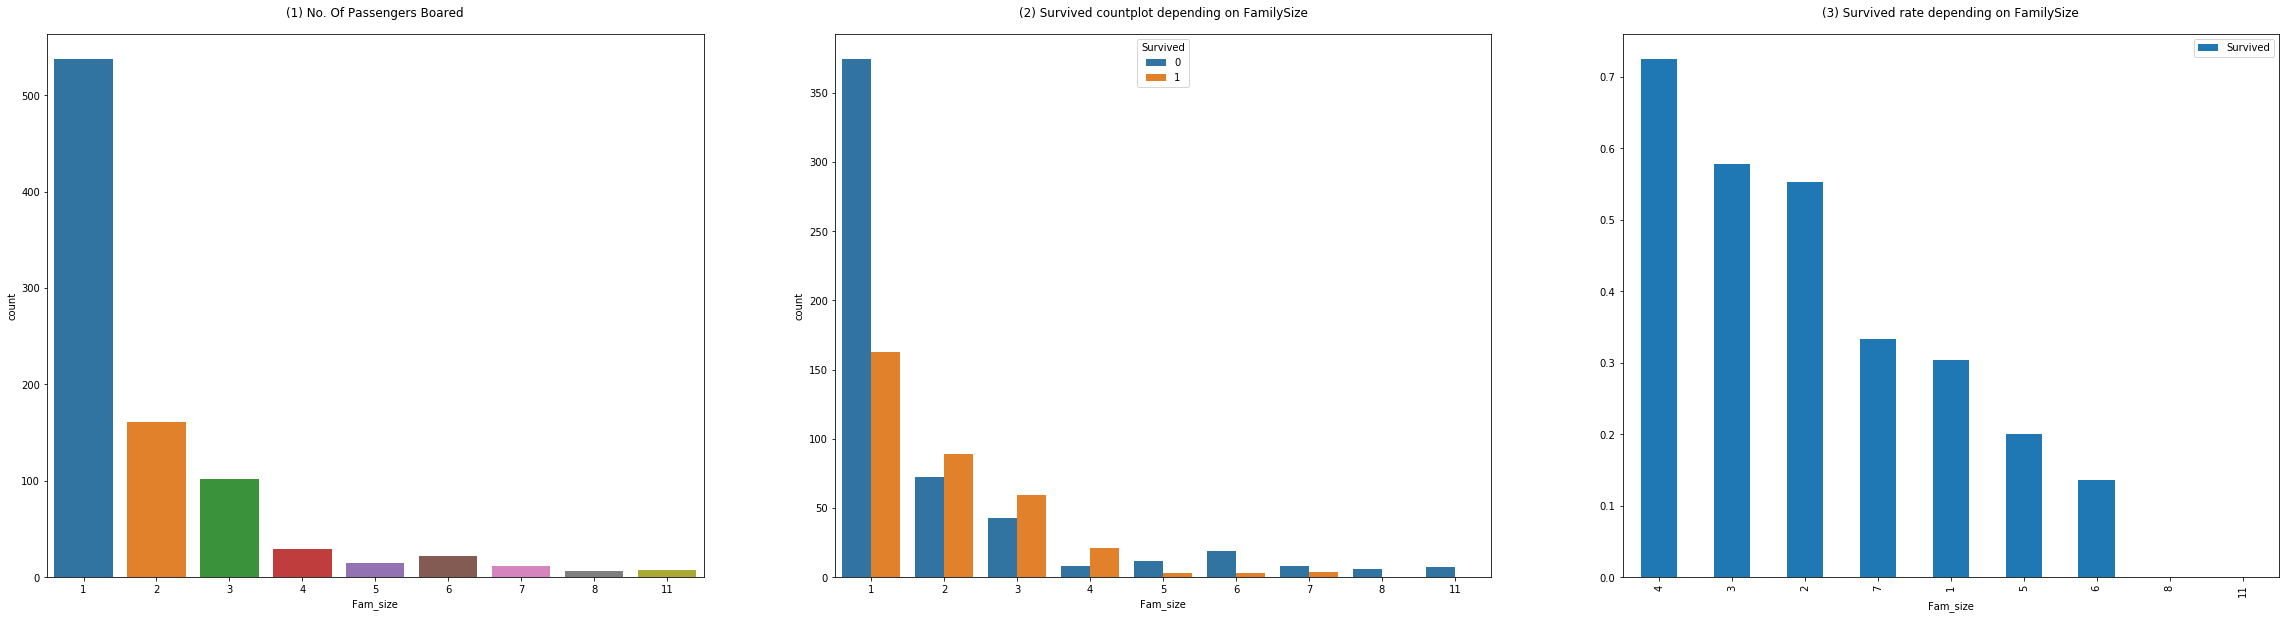

In [43]:
figure, ax = plt.subplots(1, 3, figsize = (40, 10))

sns.countplot(data = train, x = 'Fam_size', ax = ax[0])
ax[0].set_title('(1) No. Of Passengers Boared', y = 1.02)

sns.countplot(data = train, x = 'Fam_size', hue = 'Survived', ax = ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y = 1.02)

train[['Fam_size', 'Survived']].groupby(['Fam_size'], as_index = True).mean().sort_values(
    by = 'Survived', ascending = False).plot.bar(ax = ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y = 1.02)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

### 3-9. Fare

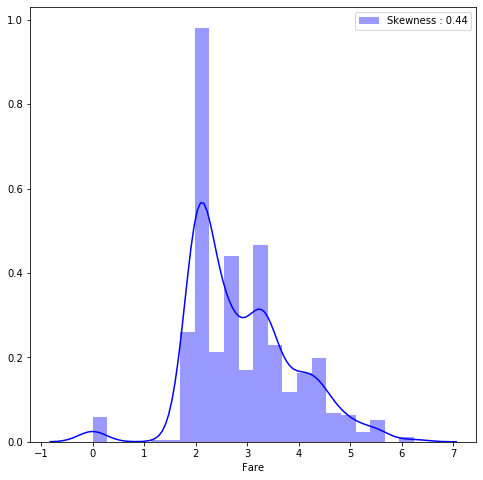

In [52]:
figure, ax = plt.subplots(1, 1, figsize = (8, 8))

sns.distplot(train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format(
    train['Fare'].skew()), ax = ax).legend(loc = 'best')

In [48]:
# test셋의 null 값을 평균으로 넣어준다.
test.loc[test.Fare.isnull(), 'Fare'] = test['Fare'].mean()

# 우리가 지금 원하는 것은 Fare columns 의 데이터 모두를 log 값 취하는 것인데, 
# 파이썬의 간단한 lambda 함수를 이용해 간단한 로그를 적용하는 함수를 map 에 인수로 넣어주면, Fare columns 데이터에 그대로 적용이 됩니다. 
# 매우 유용한 기능이니 꼭 숙지하세요!
train['Fare'] = train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
test['Fare'] = test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

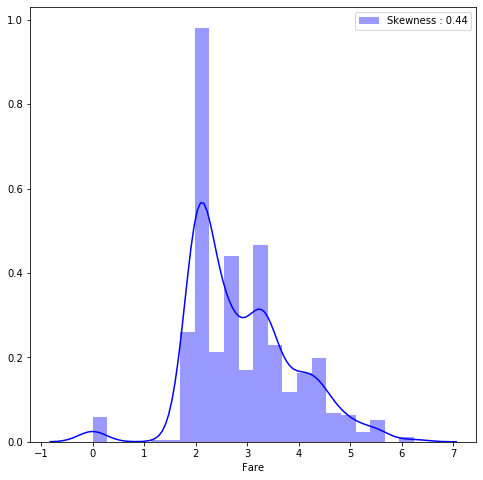

In [53]:
figure, ax = plt.subplots(1, 1, figsize = (8, 8))

sns.distplot(train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format(
    train['Fare'].skew()), ax = ax).legend(loc = 'best')

### 3-10. Cabin

In [61]:
print(train['Cabin'].shape)
print(train['Cabin'].count())
print(train['Cabin'].isnull().sum())

(891,)
204
687


### 3-11. Ticket

In [63]:
train['Ticket'].head()

PassengerId
1           A/5 21171
2            PC 17599
3    STON/O2. 3101282
4              113803
5              373450
Name: Ticket, dtype: object

In [65]:
train['Ticket'].value_counts()

347082      7
1601        7
CA. 2343    7
CA 2144     6
347088      6
           ..
113783      1
349208      1
65304       1
PC 17585    1
349242      1
Name: Ticket, Length: 681, dtype: int64

In [33]:
# drop으로 열(컬럼)을 제거할때는 언제나 axis=1 옵션을 넣어야함
# (반대로 axis=0은 열(컬럼)이 아닌 행(로우)를 제거하는 역할)
train_drop_ticket = train.drop("Ticket", axis=1)

print(train.shape)
print(train_drop_ticket.shape)
train_drop_ticket.head()

(891, 11)
(891, 10)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


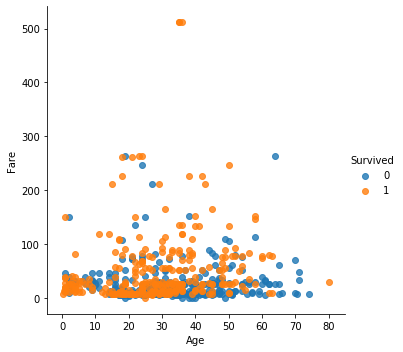

In [34]:
# 상관관계
# 선형회귀 적합 선을 포함시키지 않을려면 fit_reg=False 추가
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived", fit_reg=False)

In [22]:
print(train[train["Fare"] < 500].shape)
print(train[train["Fare"] < 300].shape)
print(train[train["Fare"] < 200].shape)
print(train[train["Fare"] < 100].shape)
print(train[train["Fare"] < 50].shape)

(891, 11)
(888, 11)
(888, 11)
(871, 11)
(838, 11)
(730, 11)


(891, 11) (888, 11)


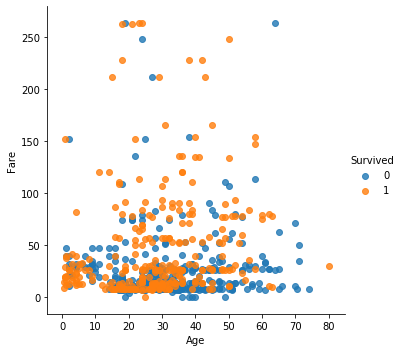

In [23]:
train_fare_under_500 = train[train['Fare'] < 500]
print(train.shape, train_fare_under_500.shape)
sns.lmplot(data=train_fare_under_500, x="Age", y="Fare", hue="Survived", fit_reg=False)

(891, 11) (838, 11)


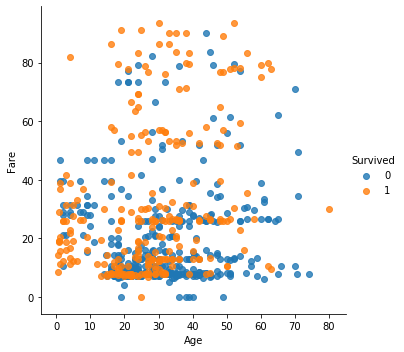

In [24]:
train_fare_under_100 = train[train['Fare'] < 100]
print(train.shape, train_fare_under_100.shape)
sns.lmplot(data=train_fare_under_100, x="Age", y="Fare", hue="Survived", fit_reg=False)

# Data Processing

In [6]:
# 오브젝트만 뽑아서 보기
train.select_dtypes(include=["object"]).head()

,Name,Sex,Ticket,Cabin,Embarked
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
5,"Allen, Mr. William Henry",male,373450,NaN,S


In [11]:
# 결측치가 있는 값 보기
print(train[train.isnull().any(axis=1)].shape)
train[train.isnull().any(axis=1)].head()

(708, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


### -Age

In [25]:
train["Child"] = train["Age"] < 15

print(train.shape)
train[["Age", "Child"]].head()

(891, 11)
(891, 12)


,Age,Child
PassengerId,,
1,22.0,False
2,38.0,False
3,26.0,False
4,35.0,False
5,35.0,False


In [26]:
test["Child"] = test["Age"] < 15

print(test.shape)
test[["Age", "Child"]].head()

(418, 10)
(418, 11)


,Age,Child
PassengerId,,
892,34.5,False
893,47.0,False
894,62.0,False
895,27.0,False
896,22.0,False


### -Fare Processing

In [27]:
train["Fare_fillin"] = train["Fare"]

print(train.shape)
train.head()

(891, 12)
(891, 13)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child,Fare_fillin
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,7.2500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,71.2833
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,7.9250
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,53.1000
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,8.0500


In [28]:
test["Fare_fillin"] = test["Fare"]

print(test.shape)
test.head()

(418, 11)
(418, 12)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child,Fare_fillin
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,False,7.8292
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,False,7.0000
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,False,9.6875
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,False,8.6625
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,False,12.2875


In [29]:
test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child,Fare_fillin
PassengerId,,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,False,NaN


In [30]:
test.loc[test["Fare"].isnull(), "Fare_fillin"] = 0
test.loc[test["Fare"].isnull(), ["Fare", "Fare_fillin"]]

,Fare,Fare_fillin
PassengerId,,
1044,NaN,0.0


### -Embarked Processing

In [31]:
train["Eb_C"] = train["Embarked"] == "C"
train["Eb_S"] = train["Embarked"] == "S"
train["Eb_Q"] = train["Embarked"] == "Q"

print(train.shape)
train[["Embarked", "Eb_C", "Eb_S", "Eb_Q"]].head()

(891, 13)
(891, 16)


,Embarked,Eb_C,Eb_S,Eb_Q
PassengerId,,,,
1,S,False,True,False
2,C,True,False,False
3,S,False,True,False
4,S,False,True,False
5,S,False,True,False


In [32]:
test["Eb_C"] = test["Embarked"] == "C"
test["Eb_S"] = test["Embarked"] == "S"
test["Eb_Q"] = test["Embarked"] == "Q"

print(test.shape)
test[["Embarked", "Eb_C", "Eb_S", "Eb_Q"]].head()

(418, 12)
(418, 15)


,Embarked,Eb_C,Eb_S,Eb_Q
PassengerId,,,,
892,Q,False,False,True
893,S,False,True,False
894,Q,False,False,True
895,S,False,True,False
896,S,False,True,False


### -Sex Processing

In [33]:
#train["Sex"] = train["Sex"].apply(lambda s:1 if s == female else 0)
#test["Sex"] = train["Sex"].apply(lambda s:1 if s == female else 0)

train.loc[train["Sex"] == "male", "Sex_enc"] = 0
train.loc[train["Sex"] == "female", "Sex_enc"] = 1

print(train.shape)
train.head()

(891, 16)
(891, 17)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child,Fare_fillin,Eb_C,Eb_S,Eb_Q,Sex_enc
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,7.2500,False,True,False,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,71.2833,True,False,False,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,7.9250,False,True,False,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,53.1000,False,True,False,1.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,8.0500,False,True,False,0.0


In [34]:
test.loc[test["Sex"] == "male", "Sex_enc"] = 0
test.loc[test["Sex"] == "female", "Sex_enc"] = 1

print(test.shape)
test.head()

(418, 15)
(418, 16)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child,Fare_fillin,Eb_C,Eb_S,Eb_Q,Sex_enc
PassengerId,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,False,7.8292,False,False,True,0.0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,False,7.0000,False,True,False,1.0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,False,9.6875,False,False,True,0.0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,False,8.6625,False,True,False,0.0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,False,12.2875,False,True,False,1.0


# * One Hot Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

def gender_to_int(data):
    le = LabelEncoder()
    le.fit(["male", "female"])
    data["Sex"] = le.transform(data["Sex"])
    return data

train = gender_to_int(train)
test = gender_to_int(test)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [13]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


# * 판다스를 이용한 One Hot Encoding

In [ ]:
def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        data = data.drop(column, axis=1)
    return data

dummy_columns = ["Sex", "Pclass", "Embarked"]
train = dummy_data(train, dummy_columns)
test = dummy_data(train, dummy_columns)

print(train.shape)
print(test.shape)

In [ ]:
train.head()

In [ ]:
test.head()

### -SibSp, Parch Processing

In [35]:
train["Fam_size"] = train["SibSp"] + train["Parch"] + 1

print(train.shape)
train[["SibSp", "Parch", "Fam_size"]].head()

(891, 17)
(891, 18)


,SibSp,Parch,Fam_size
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1


,Survived
Fam_size,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


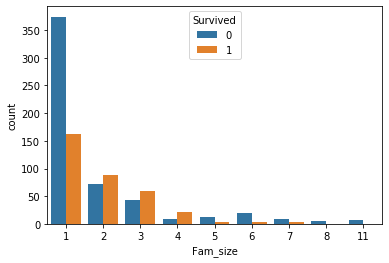

In [36]:
sns.countplot(data=train, x="Fam_size", hue="Survived")
pd.pivot_table(data=train, index="Fam_size", values="Survived")

In [37]:
train.loc[train["Fam_size"] == 1, "Fam_type"] = "Single"
train.loc[(train["Fam_size"] > 1) & (train["Fam_size"] < 5), "Fam_type"] = "Nuclear"
train.loc[train["Fam_size"] >= 5, "Fam_type"] = "Big"

print(train.shape)
train[["Fam_size", "Fam_type"]].head()

(891, 18)
(891, 19)


,Fam_size,Fam_type
PassengerId,,
1,2,Nuclear
2,2,Nuclear
3,1,Single
4,2,Nuclear
5,1,Single


,Survived
Fam_type,
Big,0.161290
Nuclear,0.578767
Single,0.303538


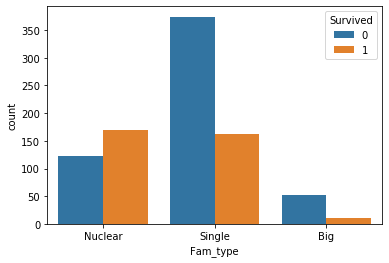

In [38]:
sns.countplot(data=train, x="Fam_type", hue="Survived")
pd.pivot_table(data=train, index="Fam_type", values="Survived")

In [39]:
train["Single"] = train["Fam_size"] == 1
train["Nuclear"] = (train["Fam_size"] > 1) & (train["Fam_size"] < 5)
train["Big"] = train["Fam_size"] > 5

print(train.shape)
train[["Fam_size", "Single", "Nuclear", "Big"]].head()

(891, 19)
(891, 22)


,Fam_size,Single,Nuclear,Big
PassengerId,,,,
1,2,False,True,False
2,2,False,True,False
3,1,True,False,False
4,2,False,True,False
5,1,True,False,False


In [40]:
test["Fam_size"] = test["SibSp"] + test["Parch"] + 1

print(test.shape)
test[["SibSp", "Parch", "Fam_size"]].head()

(418, 16)
(418, 17)


,SibSp,Parch,Fam_size
PassengerId,,,
892,0,0,1
893,1,0,2
894,0,0,1
895,0,0,1
896,1,1,3


In [41]:
test["Single"] = test["Fam_size"] == 1
test["Nuclear"] = (test["Fam_size"] > 1) & (test["Fam_size"] < 5)
test["Big"] = test["Fam_size"] > 5

print(test.shape)
test[["Fam_size", "Single", "Nuclear", "Big"]].head()

(418, 17)
(418, 20)


,Fam_size,Single,Nuclear,Big
PassengerId,,,,
892,1,True,False,False
893,2,False,True,False
894,1,True,False,False
895,1,True,False,False
896,3,False,True,False


### -Name Processing

In [42]:
train["Name"].head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [43]:
print(train["Name"][1])
print(train["Name"][1].split(", "))
print(train["Name"][1].split(", ")[0], "//", train["Name"][1].split(", ")[1])
print(train["Name"][1].split(", ")[1].split(". "))
print(train["Name"][1].split(", ")[1].split(". ")[0])

Braund, Mr. Owen Harris
['Braund', 'Mr. Owen Harris']
Braund // Mr. Owen Harris
['Mr', 'Owen Harris']
Mr


In [44]:
def get_title(name):
    return name.split(", ")[1].split(". ")[0]

train["Name"].apply(get_title).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [45]:
## 이름을 가진 사람의 수
name_data = train["Name"].apply(get_title)
name_data.count()

891

In [46]:
name_data.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Lady              1
Mme               1
Jonkheer          1
Capt              1
the Countess      1
Don               1
Sir               1
Ms                1
Name: Name, dtype: int64

In [47]:
train.loc[train["Name"].str.contains("Mr"), "Name_title"] = "Mr"
train.loc[train["Name"].str.contains("Miss"), "Name_title"] = "Miss"
train.loc[train["Name"].str.contains("Mrs"), "Name_title"] = "Mrs"
train.loc[train["Name"].str.contains("Master"), "Name_title"] = "Master"

print(train.shape)
train[["Name", "Name_title"]].head()

(891, 22)
(891, 23)


,Name,Name_title
PassengerId,,
1,"Braund, Mr. Owen Harris",Mr
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
3,"Heikkinen, Miss. Laina",Miss
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
5,"Allen, Mr. William Henry",Mr


In [48]:
train['Survived'].groupby(train['Name_title']).mean()

Name_title
Master    0.575000
Miss      0.700000
Mr        0.158301
Mrs       0.790698
Name: Survived, dtype: float64

,Survived
Name_title,
Master,0.575000
Miss,0.700000
Mr,0.158301
Mrs,0.790698


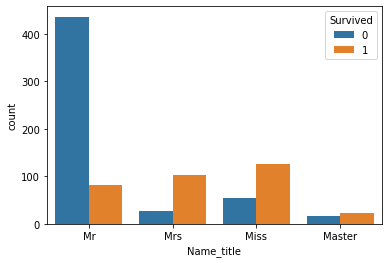

In [49]:
sns.countplot(data=train, x="Name_title", hue="Survived")
pd.pivot_table(data=train, index="Name_title", values="Survived")

In [50]:
test.loc[test["Name"].str.contains("Mr"), "Name_title"] = "Mr"
test.loc[test["Name"].str.contains("Miss"), "Name_title"] = "Miss"
test.loc[test["Name"].str.contains("Mrs"), "Name_title"] = "Mrs"
test.loc[test["Name"].str.contains("Master"), "Name_title"] = "Master"

print(test.shape)
test[["Name", "Name_title"]].head()

(418, 20)
(418, 21)


,Name,Name_title
PassengerId,,
892,"Kelly, Mr. James",Mr
893,"Wilkes, Mrs. James (Ellen Needs)",Mrs
894,"Myles, Mr. Thomas Francis",Mr
895,"Wirz, Mr. Albert",Mr
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",Mrs


In [51]:
train["Master"] = train["Name"].str.contains("Master")

print(train.shape)
train[["Name", "Master"]].head()

(891, 23)
(891, 24)


,Name,Master
PassengerId,,
1,"Braund, Mr. Owen Harris",False
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",False
3,"Heikkinen, Miss. Laina",False
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False
5,"Allen, Mr. William Henry",False


In [52]:
test["Master"] = test["Name"].str.contains("Master")

print(test.shape)
test[["Name", "Master"]].head()

(418, 21)
(418, 22)


,Name,Master
PassengerId,,
892,"Kelly, Mr. James",False
893,"Wilkes, Mrs. James (Ellen Needs)",False
894,"Myles, Mr. Thomas Francis",False
895,"Wirz, Mr. Albert",False
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",False


# Useless Columns Drop

In [ ]:
# def drop_useless_data(data, columns):
#     return data.drop(columns, axis=1)

# drop_useless_columns = ["PassengerId", "Name", "Ticket", "Cabin"]
# train = drop_useless_data(train, drop_useless_columns)
# test = drop_useless_data(train, drop_useless_columns)

# print(train.shape)
# print(test.shape)

# Learning

In [53]:
feature_names = ["Pclass", "Sex_enc", "Child","Fare_fillin", "Eb_C", "Eb_S", "Eb_Q", "Single", "Nuclear", "Big", "Master"]
feature_names

['Pclass',
 'Sex_enc',
 'Child',
 'Fare_fillin',
 'Eb_C',
 'Eb_S',
 'Eb_Q',
 'Single',
 'Nuclear',
 'Big',
 'Master']

In [54]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(891, 11)


,Pclass,Sex_enc,Child,Fare_fillin,Eb_C,Eb_S,Eb_Q,Single,Nuclear,Big,Master
PassengerId,,,,,,,,,,,
1,3,0.0,False,7.2500,False,True,False,False,True,False,False
2,1,1.0,False,71.2833,True,False,False,False,True,False,False
3,3,1.0,False,7.9250,False,True,False,True,False,False,False
4,1,1.0,False,53.1000,False,True,False,False,True,False,False
5,3,0.0,False,8.0500,False,True,False,True,False,False,False


In [55]:
label_name = "Survived"
label_name
y_train = train[label_name]
y_train.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [56]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(418, 11)


,Pclass,Sex_enc,Child,Fare_fillin,Eb_C,Eb_S,Eb_Q,Single,Nuclear,Big,Master
PassengerId,,,,,,,,,,,
892,3,0.0,False,7.8292,False,False,True,True,False,False,False
893,3,1.0,False,7.0000,False,True,False,False,True,False,False
894,2,0.0,False,9.6875,False,False,True,True,False,False,False
895,3,0.0,False,8.6625,False,True,False,True,False,False,False
896,3,1.0,False,12.2875,False,True,False,False,True,False,False


# Machine Learning

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import shuffle

In [78]:
def train_and_test(name, model):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy = round(model.score(X_train, y_train) * 100, 2)
    print(name, " \nAccuracy : ", accuracy, "%")
    return prediction

In [79]:
# Logistic Regression
log_pred = train_and_test("Logistic Regression", LogisticRegression())
# SVM
svm_pred = train_and_test("SVM", SVC())
# kNN
knn_pred_4 = train_and_test("kNN", KNeighborsClassifier(n_neighbors = 4))
# Random Forest
rf_pred = train_and_test("Random Forest", RandomForestClassifier(n_estimators=100))
# Navie Bayes
nb_pred = train_and_test("Navie Bayes", GaussianNB())

/Users/myeongjintak/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression  
Accuracy :  83.16 %
SVM  
Accuracy :  67.45 %
kNN  
Accuracy :  83.73 %
Random Forest  
Accuracy :  92.37 %
Navie Bayes  
Accuracy :  75.98 %


# Use Decicsion Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Use Random Forest

In [109]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Hypterparameter Tuning

In [1]:
# from sklearn.ensemble import RandomForestRegressor

# best_n_estimators = 3000
# best_max_depth = 83
# best_max_features = 0.851358

# model = RandomForestRegressor(n_estimators=best_n_estimators,
#                               max_depth=best_max_depth,
#                               max_features=best_max_features,
#                               random_state=66,
#                               n_jobs=-1)
# model

# Fit

In [ ]:
decision_tree.fit(X_train, y_train)

In [112]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Graphviz

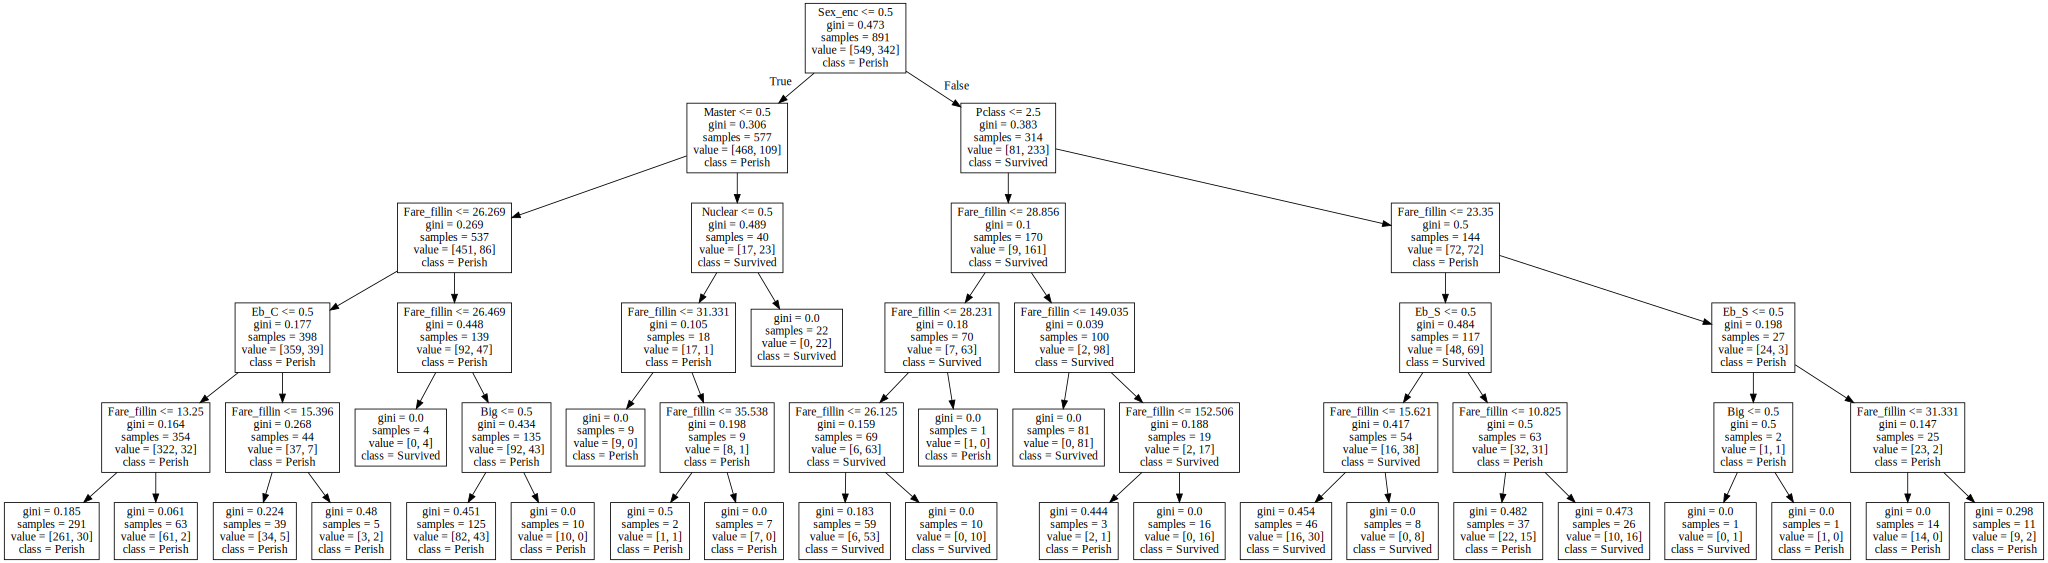

In [61]:
import graphviz
from sklearn.tree import export_graphviz
dot_tree = export_graphviz(model,
                           feature_names = feature_names,
                           class_names = ["Perish", "Survived"],
                           out_file = None)
graphviz.Source(dot_tree)

# Predict

In [110]:
predictions = decision_tree.predict(X_test)
print(predictions.shape)
print(predictions[:10])
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

(418,)
[0 0 0 0 1 0 1 0 1 0]


85.07

In [113]:
predictions = random_forest.predict(X_test)
print(predictions.shape)
print(predictions[:10])
acc_decision_tree = round(random_forest.score(X_train, y_train) * 100, 2)
acc_decision_tree

(418,)
[0 1 0 0 1 0 0 0 1 0]


92.37

# Submit

In [114]:
submit = pd.read_csv("data/gender_submission.csv", index_col="PassengerId")
print(submit.shape)
submit.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [115]:
submit["Survived"] = predictions
print(submit.shape)
submit.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [117]:
submit.to_csv("data/titanic_practice_200218.csv") 
#titanic_practice_200214 - 0.80861